In [172]:
import pandas as pd
import numpy as np
import os
os.getcwd()
df1 = pd.read_csv('airq402.txt', delimiter=r"    ",skiprows=8,names=['COLUMN_NAME','RANGE'],header = None,engine='python')
col_list=df1['COLUMN_NAME'].tolist()
col_range=df1['RANGE'].tolist()
colspecs=list()
for i in col_range:
    st=int(i.split('-')[0])-1
    ed=int(i.split('-')[1])
    colspecs.append((st,ed))

df2=pd.read_fwf('airq402.dat.txt', colspecs=colspecs,names=col_list)
df2.head(3)
#df2.corr()


/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:710: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


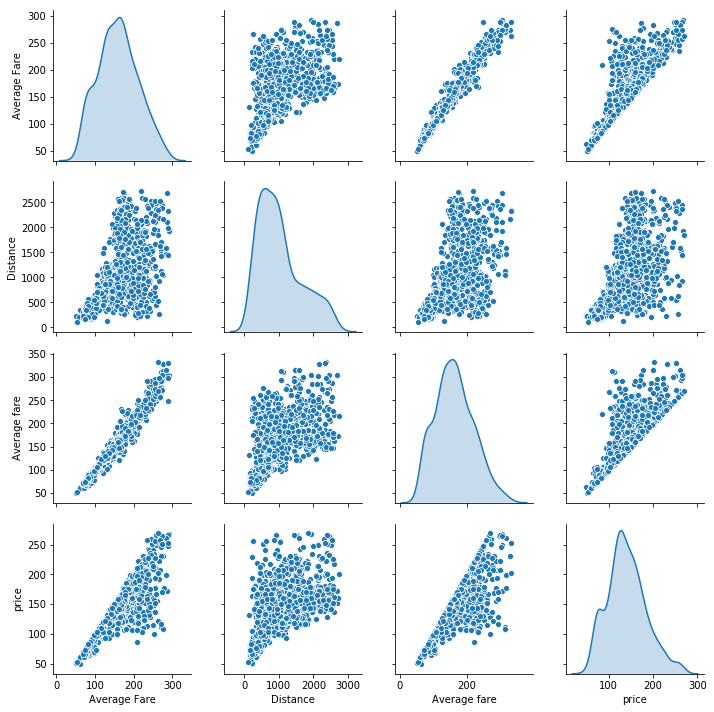

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.pairplot( data , diag_kind='kde')
from scipy import stats
#indexNames = dfObj[ (dfObj['Age'] >= 30) & (dfObj['Age'] <= 40) ].index
#dfObj.drop(indexNames , inplace=True)
df2.drop(['Low price airline','City1','City2','market leading airline','Low price airline'],axis=1,inplace=True)
df2.head(3)
newdata = df2[(np.abs(stats.zscore(df2)) < 2.698).all(axis=1)]
newdata.corr()
newdata.drop(['Average weekly passengers','market share','market share.1'],axis=1,inplace=True)
newdata.corr()
newdata.head(3)
#sns.boxplot(x=df2['Average fare'])
sns.pairplot( newdata , diag_kind='kde')

Import and store the data in a data frame. (3 points)
Remove the outliers from the data (5 points)
Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable and split the table. (3 points)
Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)
Create scatter Plot of Independent Variable vs Dependent Variable. (4 points)
Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)
Print the coefficients & intercepts of the linear regression model (5 points)

In [180]:
newdata
x1 = newdata[["Distance"]]
x2 = newdata[["Average fare"]]
x3 = newdata[["price"]]
#x = newdata[[" dl", "tax"]]
y = newdata[["Average Fare"]]
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.20, random_state=1)
linreg1 = LinearRegression()
linreg1.fit(x1_train, y1_train)
print(linreg1.intercept_)
Distco=linreg1.coef_
print(Distco)
print(linreg1.score(x1_train,y1_train))
print('____')
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.20, random_state=1)
linreg2 = LinearRegression()
linreg2.fit(x2_train, y2_train)
print(linreg2.intercept_)
Avgfco=linreg2.coef_
print(Avgfco)
print(linreg2.score(x2_train,y2_train))
print('____')
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y, test_size=0.20, random_state=1)
linreg3 = LinearRegression()
linreg3.fit(x3_train, y3_train)
print(linreg3.intercept_)
Priceco=linreg3.coef_
print(Priceco)
print(linreg3.score(x3_train,y3_train))
print('____')
x4 = newdata[["Distance","Average fare","price"]]
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y, test_size=0.20, random_state=1)
linreg4 = LinearRegression()
linreg4.fit(x4_train, y4_train)
print(linreg4.intercept_)
Priceco=linreg4.coef_
print(Priceco)
print(linreg4.score(x4_train,y4_train))

[112.60562563]
[[0.04597212]]
0.3009722476713895
____
[15.12316078]
[[0.89265309]]
0.9628515335731084
____
[17.65385409]
[[1.0130145]]
0.7382819785012908
____
[7.78488909]
[[0.00205457 0.76245087 0.1876491 ]]
0.9726192055477201
